In [1]:
import pandas as pd

In [2]:
from pandas import datetime

In [3]:
import matplotlib.pyplot as plt 

In [4]:
import statsmodels

In [6]:
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA

In [8]:
def parser(x):
    return datetime.strptime(x, '%m/%d/%Y')

stock = pd.read_csv(r'C:\Users\rajla\Desktop\AMZN_timeseries.csv')
stock.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,11/1/2018,1623.530029,1670.449951,1598.439941,1665.530029,1665.530029,8135500
1,11/2/2018,1678.589966,1697.439941,1651.829956,1665.530029,1665.530029,6955500
2,11/5/2018,1657.569946,1658.089966,1596.359985,1627.800049,1627.800049,5624700
3,11/6/2018,1618.349976,1665.000000,1614.550049,1642.810059,1642.810059,4257400
4,11/7/2018,1673.000000,1759.229980,1664.079956,1755.489990,1755.489990,8192200


In [11]:
stock.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

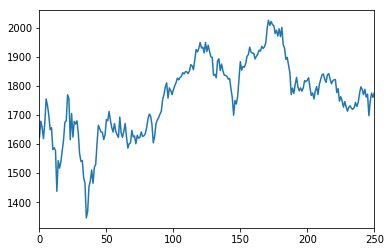

In [13]:
stock['Open'].plot()

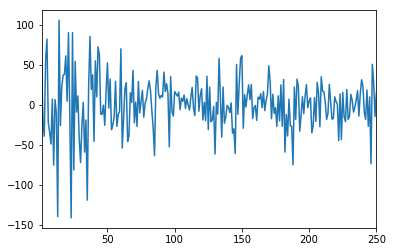

In [15]:
# make the data Stationary 
stock1 = stock['Open'].diff(periods=1)
stock1 = stock1[1:]
stock1.plot()

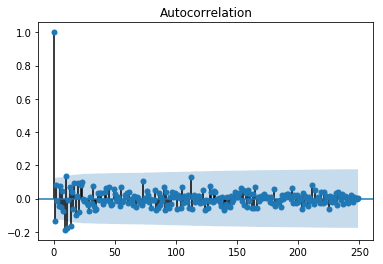

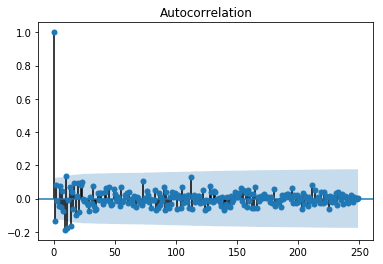

In [18]:
plot_acf(stock1)

In [17]:
x=stock.Open
x.size

251

In [19]:
train = x[0:226]
test = x[226:]

In [45]:
model_arima=ARIMA(train, order=(15,2,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)
prediction1=model_arima_fit.forecast(steps=25)[0]
print(prediction1)

2234.1163943836787
[1757.45223462 1758.43399151 1758.93941867 1755.17337817 1758.35757401
 1760.17539891 1761.24853694 1773.18724865 1764.17705811 1767.79114779
 1773.84997931 1765.13386763 1775.79522187 1766.14353775 1770.3059424
 1763.26227182 1762.56156979 1762.64694696 1757.1412506  1756.00049927
 1756.94060472 1747.93259356 1753.75887835 1746.85650048 1748.92151604]


C:\Users\rajla\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


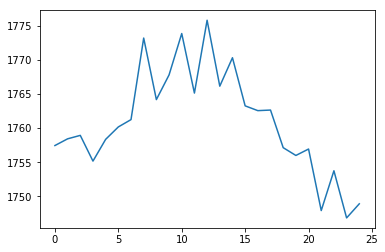

In [37]:
plt.plot(prediction1)

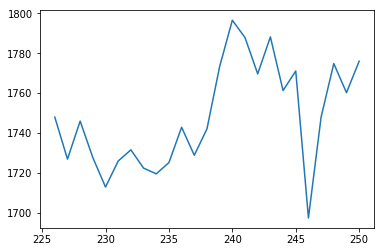

In [38]:
plt.plot(test)